In [3]:
## CAUTION: this packet is mandatory for Twint working ##

import nest_asyncio
nest_asyncio.apply()

# rest of the code
import twint
import pandas as pd
import preprocessor as p
import re
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns

import os 

import numpy as np

import nltk
import sklearn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('always')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thibaud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thibaud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tweet Scrapping 

In [4]:
def tweet_scrap(movie_name):
    
    c = twint.Config()
    #c.Username = "apple"
    c.Search =  "#{}".format(movie_name)
    #c.Search =  "#Mandalorien"
    #c.Format = "Tweet: {tweet}"
    c.Hide_output = True
    c.Lang = "en"
    c.Limit = 400
    c.Store_csv = True 
    ## Custom the output ##
    c.Custom["Tweet"] = ["tweet"]
    #c.Custom["Date"] = ["date"]

    c.Output = "{}.csv".format(movie_name)
    #c.Pandas = True
    
    twint.run.Search(c)
    warnings.filterwarnings('ignore')

## Tweet cleaning - Preprocess 

In [5]:
def Clean(dataframe):
    #Remove non ASCII characters:
    dataframe = dataframe.encode('ascii','ignore')
    dataframe = dataframe.decode('utf8')
    
    #Remove URLs : 
    dataframe = re.sub('http\S+\s*','',dataframe)  
    
    
    #removing mentions:
    dataframe = re.sub('rt|cc','',dataframe) #Remove RT and cc
    dataframe = re.sub('#\S+','',dataframe) #Remove hashtags
    
    dataframe = dataframe.lower() #Converting to lowercase
    #dataframe = re.sub(r'\d+', '', dataframe) #Removing numbers
    dataframe = re.sub(r'[^a-zA-Z0-9\s]', '', dataframe) #Removing punctuations
    dataframe = dataframe.strip() #remove white spaces
    dataframe = re.sub('pictw\S+\s*','',dataframe)
    
    #Tokenize: 
    word_tokens = word_tokenize(dataframe)
    
    #Words stops
    stop_words=set(stopwords.words('english'))

    filtered_tweet = []
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
     
    return ' '.join(filtered_tweet)

<>:7: DeprecationWarning: invalid escape sequence \S
<>:12: DeprecationWarning: invalid escape sequence \S
<>:18: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \S
<>:12: DeprecationWarning: invalid escape sequence \S
<>:18: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \S
<>:12: DeprecationWarning: invalid escape sequence \S
<>:18: DeprecationWarning: invalid escape sequence \S
<ipython-input-5-2101905cd20d>:7: DeprecationWarning: invalid escape sequence \S
  dataframe = re.sub('http\S+\s*','',dataframe)
<ipython-input-5-2101905cd20d>:12: DeprecationWarning: invalid escape sequence \S
  dataframe = re.sub('#\S+','',dataframe) #Remove hashtags
<ipython-input-5-2101905cd20d>:18: DeprecationWarning: invalid escape sequence \S
  dataframe = re.sub('pictw\S+\s*','',dataframe)


In [6]:
#df_tweet_clean = df_tweet['tweet'].apply(Clean)
#preproctest(df_tweet)

## Sentiment  Prediction with TextBlob

In [7]:
from textblob import TextBlob
from IPython.display import Markdown, display
# Pretty printing the result
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
def Senti_Blob(df_tweet_clean):
    
    senti_blob = []
    for tweet in df_tweet_clean:
        #print(tweet)
        analysis = TextBlob(tweet)
        #print(analysis.sentiment)
        #senti.append(analysis.sentiment)
        if analysis.sentiment[0]>0:
            #printmd('Positive', color="green")
            senti_blob.append('positive')
        elif analysis.sentiment[0]<0:
            #printmd('Negative', color="red")
            senti_blob.append('negative')
        else:
            #printmd("Neutre", color="grey")
            senti_blob.append('neutre')
            #print("")

    File_sentiblob = {'Tweet': df_tweet_clean,
            'Sentiment': senti_blob,
           }

    df_sentiblob = pd.DataFrame(File_sentiblob, columns= ['Tweet', 'Sentiment'])
    
    return df_sentiblob

In [ ]:
#df_tweet['tweet'].count()

In [ ]:
#File_sentiblob = {'Tweet': df_tweet_clean,
#            'Sentiment': senti_blob,
#           }

#df_sentiblob = pd.DataFrame(File, columns= ['Tweet', 'Sentiment'])
#df_sentiblob   

## Predicted Emotion Analyses  

In [ ]:
#df_sentiblob.count()

In [ ]:
#sns.countplot(x='Sentiment',data=df_sentiblob)

In [ ]:
#count_sentiblob = df_sentiblob.groupby("Sentiment", sort='count').size().reset_index(name='count')
#print('\n Sentiment with Sentiblob: \n\n', count_sentiblob)

# Classifier

### Naive Bayes :

In [8]:
def NB(X_train, X_test, Y_train):

    # fit the training dataset on the NB classifier
    Naive = MultinomialNB()
    Naive.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_NB = Naive.predict(X_test)
    
    #print(predictions_NB)
    print(f"\n NB CLASSIFIER: \n emotion positive : {list(predictions_NB).count('positive')} , negative : {list(predictions_NB).count('negative')} , neutral : {list(predictions_NB).count('neutral')} " )
    return predictions_NB

### SVM :

In [9]:
def SVM(X_train, X_test, Y_train):
    
    SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_SVM = SVM.predict(X_test)

    #print(predictions_SVM)
    print(f"\n SVM CLASSIFIER: \n emotion positive : {list(predictions_SVM).count('positive')} , negative : {list(predictions_SVM).count('negative')} , neutral : {list(predictions_SVM).count('neutral')}" )
    return predictions_SVM 

### Random Forest Classifier

In [10]:
def RFC(X_train, X_test, Y_train):
    
    RFC = RandomForestClassifier(n_estimators=1000, random_state=0)
    RFC.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_RFC = RFC.predict(X_test)

    print(f"\n RFC CLASSIFIER: \n emotion positive : {list(predictions_RFC).count('positive')} , negative : {list(predictions_RFC).count('negative')}, neutral : {list(predictions_RFC).count('neutral')} " )
    return predictions_RFC 

### Logistic Regression

In [11]:
def LR(X_train, X_test, Y_train ):
    
    logreg = LogisticRegression(solver='liblinear', multi_class='auto')
    logreg.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_LR = logreg.predict(X_test)

    print(f"\n Logistic Regression CLASSIFIER: \n emotion positive : {list(predictions_LR).count('positive')} , negative : {list(predictions_LR).count('negative')} , neutral : {list(predictions_LR).count('neutral')}" )
    return predictions_LR 

# API

In [19]:
def Api(movie_name):
    #tweet_scrap(movie_name)  ### A commenter pour juste prendre les csv pre enregistres
    df_tweet = pd.read_csv("{}.csv".format(movie_name))
    df_tweet_clean = df_tweet['tweet'].apply(Clean)
    #Senti_Blob(df_tweet_clean)
    df_sentiment_blob = Senti_Blob(df_tweet_clean)
    print('\n \n')
    print(df_sentiment_blob)
    
    count_senti = df_sentiment_blob.count()
    print('\n \n')
    print('Total number of tweet: \n',count_senti)
    
    sns.countplot(x='Sentiment', data=df_sentiment_blob)
    
    count_sentiblob = df_sentiment_blob.groupby("Sentiment", sort='count').size().reset_index(name='count')
    print('\n #####  Sentiment with Sentiblob: ###### \n\n', count_sentiblob)
    
    ## Pourcentage 
    
    nb_tot = df_sentiment_blob['Sentiment'].shape[0]
    positive_sentiblob = list(df_sentiment_blob['Sentiment']).count('positive')
    negative_sentiblob = list(df_sentiment_blob['Sentiment']).count('negative')
    neutral_sentiblob = list(df_sentiment_blob['Sentiment']).count('neutre')

    print('\n percent of positive:', (positive_sentiblob/nb_tot)*100, '%' )
    print( '\n percent of negative:', (negative_sentiblob/nb_tot)*100, '%')
    print('\n percent of neutre:', (neutral_sentiblob/nb_tot)*100, '%')
    
    
    #### PLOT pourcent Senti BLOB ##
    
    labels = ['positive', 'neutral', 'negative']
    pred_NB = [(positive_sentiblob/nb_tot)*100, (neutral_sentiblob/nb_tot)*100, (negative_sentiblob/nb_tot)*100 ]
    

    x = np.arange(len(labels))  # the label locationsc
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x , pred_NB, width)
   
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent')
    ax.set_title('Sentiment Percentage Prediction with SentiBlob')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()
    
    #######################################
    
    
    data_clean = df_tweet_clean
    
    ## Training file
    train_data = pd.read_csv('train.csv', encoding='utf-8')
    train_data = train_data[['Category', 'Tweet']]
    train_data.rename(columns={'Category': 'emotion'}, inplace=True)
    train_data = train_data[train_data['emotion'] != 'Tweet']
    train_data = train_data[train_data['Tweet'] != "Not Available"]
    train_data_clean = train_data['Tweet'].apply(Clean)
    
    
    sns.countplot(x='emotion',data=train_data)
    
    #Vectorizer : 
    count_vectorizer = CountVectorizer()
    X_train = count_vectorizer.fit_transform(train_data_clean)
    Y_train = train_data['emotion']
    X_test = count_vectorizer.transform(data_clean)

    #print(X_train.shape, Y_train.shape, X_test.shape)
    
    print('\n #####  Sentiment Prediction with CLASSIFIER : ###### \n\n')
    
    ## Classifier ####
    
    predictions_NB = NB(X_train, X_test, Y_train)
    predictions_SVM = SVM(X_train, X_test, Y_train)
    predictions_RFC = RFC(X_train, X_test, Y_train)
    predictions_LR = LR(X_train, X_test, Y_train)
    
    ### Percent calcul
    nb_NB = predictions_NB.shape[0]
    positive_NB = list(predictions_NB).count('positive')
    negative_NB = list(predictions_NB).count('negative')
    neutral_NB = list(predictions_NB).count('neutral')
    
    positive_NBp = (positive_NB/nb_NB)*100
    negative_NBp = (negative_NB/nb_NB)*100
    neutral_NBp = (neutral_NB/nb_NB)*100
    
    print("\n ------------------- Classifiers Results:   ---------------------------------")
    
    print("\n NB :")
    print( 'Positive:', positive_NBp, '%', '\nNegative:', negative_NBp, '%', '\nNeutre:', neutral_NBp, '%')

    nb_SVM = predictions_SVM.shape[0]
    positive_SVM = list(predictions_SVM).count('positive')
    negative_SVM = list(predictions_SVM).count('negative')
    neutral_SVM = list(predictions_SVM).count('neutral')
    
    positive_SVMp = (positive_SVM/nb_SVM)*100
    negative_SVMp = (negative_SVM/nb_SVM)*100
    neutral_SVMp = (neutral_SVM/nb_SVM)*100
    
    print("\n SVM :")
    print( 'Positive:', positive_SVMp ,'%', '\nNegative:', negative_SVMp ,'%', '\nNeutre:', neutral_SVMp, '%')
    
    nb_RFC = predictions_RFC.shape[0]
    positive_RFC = list(predictions_RFC).count('positive')
    negative_RFC = list(predictions_RFC).count('negative')
    neutral_RFC = list(predictions_RFC).count('neutral')
    
    
    positive_RFCp = (positive_RFC/nb_RFC)*100
    negative_RFCp = (negative_RFC/nb_RFC)*100
    neutral_RFCp = (neutral_RFC/nb_RFC)*100
    
    print("\n RFC :")
    print( 'Positive:', positive_RFCp, '%', '\nNegative:', '%', negative_RFCp, '\nNeutre:', neutral_RFCp, '%')

    nb_LR = predictions_LR.shape[0]
    positive_LR = list(predictions_LR).count('positive')
    negative_LR = list(predictions_LR).count('negative')
    neutral_LR = list(predictions_LR).count('neutral')
    
    positive_LRp = (positive_LR/nb_LR)*100
    negative_LRp = (negative_LR/nb_LR)*100
    neutral_LRp = (neutral_LR/nb_LR)*100
    
    
    print("\n LR :")
    print( 'Positive:', positive_LRp, '%', '\nNegative:', negative_LRp, '%', '\nNeutre:', neutral_LRp, '%')
    

    aver_pos = (((positive_NB/nb_NB)+(positive_SVM/nb_SVM)+(positive_LR/nb_LR))/3)*100
    aver_neg = (((negative_NB/nb_NB)+(negative_SVM/nb_SVM)+(negative_LR/nb_LR))/3)*100
    aver_neut = (((neutral_NB/nb_NB)+(neutral_SVM/nb_SVM)+(neutral_LR/nb_LR))/3)*100
   
    print("\n\nAverage :")
    print( '\nPositive:', aver_pos, '%', '\nNegative:',aver_neg, '%', '\nNeutre:', aver_neut, '%')
    
    
    
    #### PLOT  CLASSIFIER COMPARAISON  ####
    
    labels = ['positive', 'negative', 'neutral']
    pred_NB = [positive_NBp, negative_NBp, neutral_NBp]
    pred_SVM = [positive_SVMp, negative_SVMp, neutral_SVMp]
    pred_RFC = [positive_RFCp, negative_RFCp, neutral_RFCp]
    pred_LR = [positive_LRp, negative_LRp, neutral_LRp]

    x = np.arange(len(labels))  # the label locationsc
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, pred_NB, width/4, label='NB')
    rects2 = ax.bar(x - width/4, pred_SVM, width/4, label='SVM')
    rects3 = ax.bar(x + width/2, pred_RFC, width/4, label='RFC')
    rects4 = ax.bar(x + width/4, pred_LR, width/4, label='LR')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent')
    ax.set_title('Sentiment Percentage Prediction for each classifier')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()
    
    
     #### PLOT  AVERAGE  ####
       
    labels = ['positive', 'negative', 'neutral']
    pred_NB = [aver_pos, aver_neg, aver_neut ]
    

    x = np.arange(len(labels))  # the label locationsc
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x , pred_NB, width)
   
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent')
    ax.set_title(' Average: Sentiment Percentage Prediction ')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()
    
    return aver_pos
    

In [ ]:
movie_name = "Spectre"
#movie_name = "avengersendgame"
#movie_name = "peakyblinders"
#Api(movie_name)


#movie_name = "hobgoblins"
aver_mov = Api(movie_name)

In [ ]:
print(aver_mov)

 --------------------- the analyses for the movie/serie: The Mandalorian is : ---------------------------

 

                                                  Tweet Sentiment
0                                     episode 6 awesome  positive
1                                        chapter 6 good  positive
2     forgot tweet chapter 6 best episode series far...  positive
3     star wars mandalorian theyre waiting lithograp...    neutre
4     star wars mandalorian child lithograph print k...    neutre
...                                                 ...       ...
2095                          watching new episode baby  positive
2096                   chapter 6 recap ending explained    neutre
2097                                          damn good  positive
2098                                    billburr killed  negative
2099          yall wan na enjoy nonsense imma leave lol  positive

[2100 rows x 2 columns]

 

Total number of tweet: 
 Tweet        2100
Sentiment    2100
dtype: i

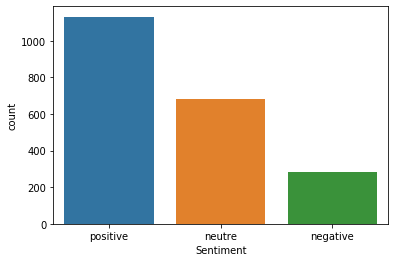

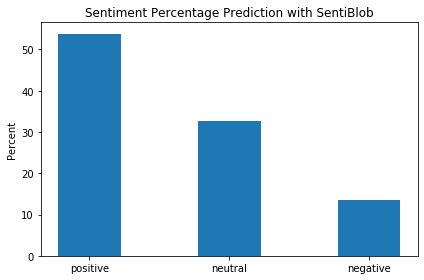


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 1641 , negative : 124 , neutral : 335 

 SVM CLASSIFIER: 
 emotion positive : 1193 , negative : 394 , neutral : 513

 RFC CLASSIFIER: 
 emotion positive : 1857 , negative : 16, neutral : 227 

 Logistic Regression CLASSIFIER: 
 emotion positive : 1388 , negative : 234 , neutral : 478

 ------------------- Classifiers Results:   ---------------------------------

 NB :
Positive: 78.14285714285715 % 
Negative: 5.904761904761905 % 
Neutre: 15.95238095238095 %

 SVM :
Positive: 56.80952380952381 % 
Negative: 18.761904761904763 % 
Neutre: 24.428571428571427 %

 RFC :
Positive: 88.42857142857142 % 
Negative: % 0.7619047619047619 
Neutre: 10.809523809523808 %

 LR :
Positive: 66.0952380952381 % 
Negative: 11.142857142857142 % 
Neutre: 22.76190476190476 %


Average :

Positive: 67.01587301587301 % 
Negative: 11.936507936507939 % 
Neutre: 21.047619047619047 %


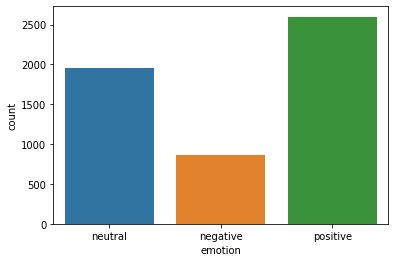

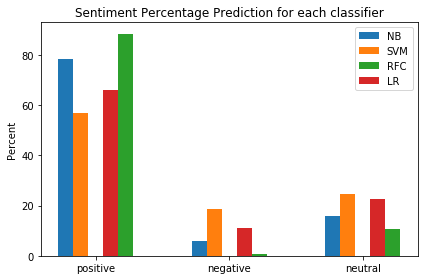

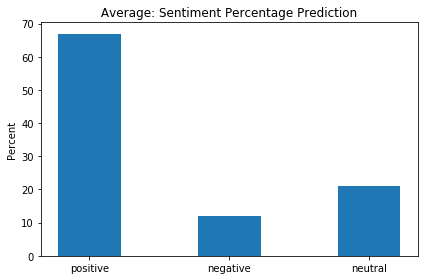

The score for the movie/serie  The Mandalorian from iMDb is:  9.0 

 
 --------------------- the analyses for the movie/serie: The Godfather is : ---------------------------

 

                                                  Tweet Sentiment
0     2019 took 2 dear men rest peace dear ones gent...    neutre
1     wasnt member hollywood inner circle grew worki...    neutre
2      winners thank caidcentre profbriancox bbcstudios    neutre
3     danny aiello right thing actor dies new jersey...  positive
4                                       rip great actor  positive
...                                                 ...       ...
1994    without doubt always always holiday staple home    neutre
1995                        isnt movie dont know family    neutre
1996             watching smell food cooking background    neutre
1997  happy thanksgiving wishing great day full warm...  positive
1998                   personal sonny strictly business    neutre

[1999 rows x 2 columns]

 

T

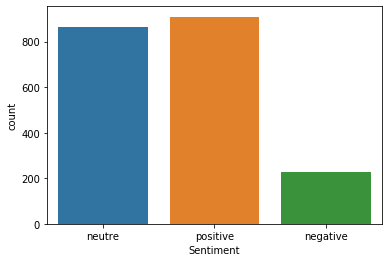

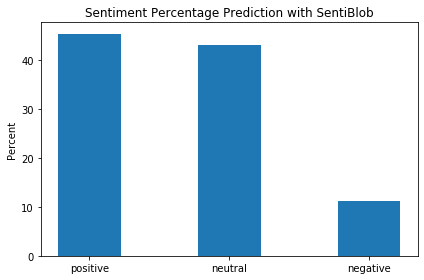


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 1542 , negative : 64 , neutral : 393 

 SVM CLASSIFIER: 
 emotion positive : 1232 , negative : 177 , neutral : 590

 RFC CLASSIFIER: 
 emotion positive : 1808 , negative : 5, neutral : 186 

 Logistic Regression CLASSIFIER: 
 emotion positive : 1347 , negative : 78 , neutral : 574

 ------------------- Classifiers Results:   ---------------------------------

 NB :
Positive: 77.13856928464232 % 
Negative: 3.2016008004002 % 
Neutre: 19.65982991495748 %

 SVM :
Positive: 61.63081540770386 % 
Negative: 8.854427213606805 % 
Neutre: 29.514757378689342 %

 RFC :
Positive: 90.44522261130565 % 
Negative: % 0.25012506253126565 
Neutre: 9.304652326163081 %

 LR :
Positive: 67.38369184592297 % 
Negative: 3.9019509754877437 % 
Neutre: 28.714357178589296 %


Average :

Positive: 68.71769217942304 % 
Negative: 5.319326329831583 % 
Neutre: 25.962981490745367 %


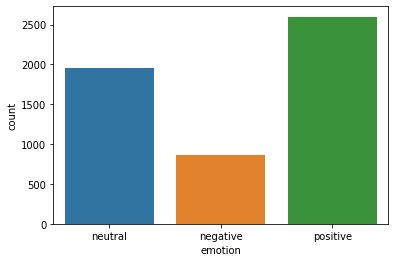

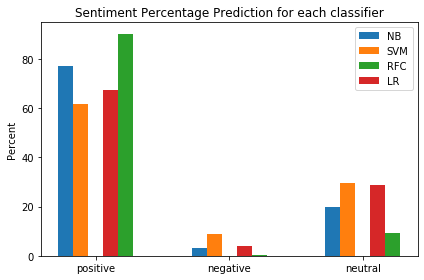

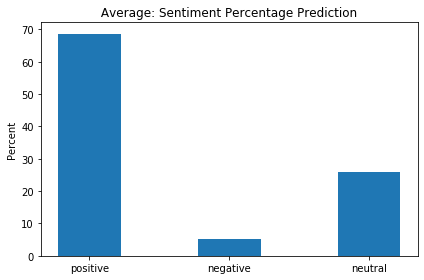

The score for the movie/serie  The Godfather from iMDb is:  9.2 

 
 --------------------- the analyses for the movie/serie: Hobgoblins is : ---------------------------

 

                                                  Tweet Sentiment
0     painted gaggle might multiple day share ordere...    neutre
1     found wad spit car windshield morning capping ...  positive
2               rule law one set rules us different set    neutre
3     agree uniquely insane circumstances wrought tr...  negative
4     without guys amazing work give man money big b...  positive
...                                                 ...       ...
3194                        someones rubbing puppets us    neutre
3195  got back right pivotal front lawn scene rake b...  positive
3196        fajita plate really hot touched ah ah mst3k  positive
3197  stripper amy want treat like di spill drinks m...    neutre
3198  know also great fan dance electric window fancrow  positive

[3199 rows x 2 columns]

 

Total 

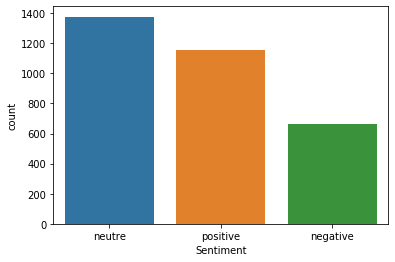

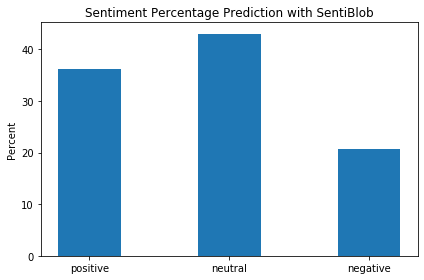


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 2183 , negative : 184 , neutral : 832 

 SVM CLASSIFIER: 
 emotion positive : 1799 , negative : 432 , neutral : 968

 RFC CLASSIFIER: 
 emotion positive : 2864 , negative : 0, neutral : 335 

 Logistic Regression CLASSIFIER: 
 emotion positive : 1991 , negative : 192 , neutral : 1016

 ------------------- Classifiers Results:   ---------------------------------

 NB :
Positive: 68.24007502344483 % 
Negative: 5.751797436698968 % 
Neutre: 26.008127539856208 %

 SVM :
Positive: 56.236323851203494 % 
Negative: 13.504220068771492 % 
Neutre: 30.25945608002501 %

 RFC :
Positive: 89.52797749296654 % 
Negative: % 0.0 
Neutre: 10.472022507033447 %

 LR :
Positive: 62.23819943732416 % 
Negative: 6.001875586120662 % 
Neutre: 31.759924976555176 %


Average :

Positive: 62.23819943732416 % 
Negative: 8.419297697197042 % 
Neutre: 29.3425028654788 %


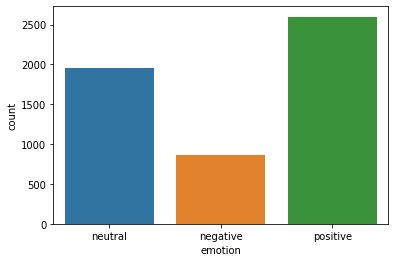

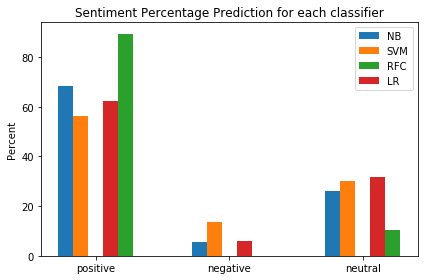

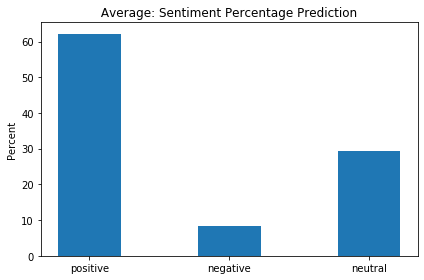

The score for the movie/serie  Hobgoblins from iMDb is:  2.2 

 
 --------------------- the analyses for the movie/serie: Slender Man is : ---------------------------

 

                                                  Tweet Sentiment
0     still need finish slenderman comic working oof...  positive
1     son mentioned school game big issue another pa...  negative
2                crane thinks hes scary wait till meets  negative
3     sta seeing man face one arm wears black suit w...  negative
4     else remembers slenderman two girls stabbed cl...    neutre
...                                                 ...       ...
1324             crane thinks hes scary wait till meets  negative
1325  new podcast freekers ball podcast 20191025 spr...  positive
1326  freekers ball podcast blog 20191025 real libey...  positive
1327  new vid slenderman ep 10 finale watch subscrib...  positive
1328  guys check first interview repeatedly stabbed ...  positive

[1329 rows x 2 columns]

 

Total nu

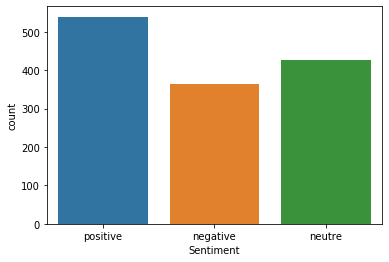

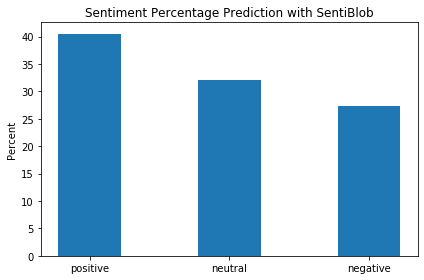


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 973 , negative : 69 , neutral : 287 

 SVM CLASSIFIER: 
 emotion positive : 751 , negative : 160 , neutral : 418

 RFC CLASSIFIER: 
 emotion positive : 1216 , negative : 5, neutral : 108 

 Logistic Regression CLASSIFIER: 
 emotion positive : 908 , negative : 65 , neutral : 356

 ------------------- Classifiers Results:   ---------------------------------

 NB :
Positive: 73.21294206170053 % 
Negative: 5.191873589164786 % 
Neutre: 21.595184349134687 %

 SVM :
Positive: 56.50865312264861 % 
Negative: 12.039127163280662 % 
Neutre: 31.45221971407073 %

 RFC :
Positive: 91.49736644093304 % 
Negative: % 0.3762227238525207 
Neutre: 8.126410835214447 %

 LR :
Positive: 68.32204665161777 % 
Negative: 4.890895410082769 % 
Neutre: 26.787057938299476 %


Average :

Positive: 66.01454727865563 % 
Negative: 7.373965387509405 % 
Neutre: 26.611487333834965 %


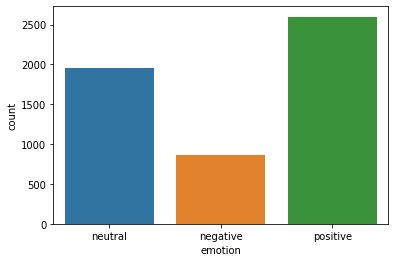

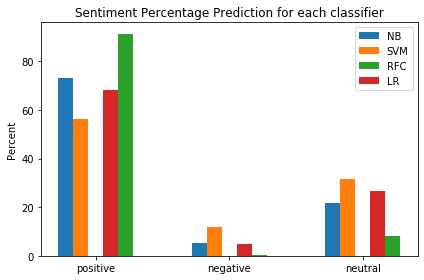

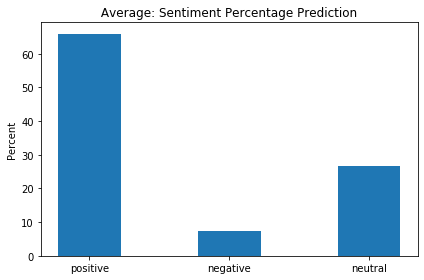

The score for the movie/serie  Slender Man from iMDb is:  3.2 

 
 --------------------- the analyses for the movie/serie: A Cinderella Story: Christmas Wish is : ---------------------------

 

                                                 Tweet Sentiment
0                                     absolutely loved  positive
1                     guys hes unrecognizable one live  positive
2                                            happening    neutre
3    netflix wbhomeent lauramarano greggsulkin isab...  positive
4    know clichd sappy yes going watch nonetheless ...  negative
..                                                 ...       ...
481  cant wait itttt wan na watch big screen like t...  negative
482  excited cant wait see jonewmarch cinderella st...  positive
483  holiday feature commences production vancouver...    neutre
484  amazing cast doesnt stop lauramarano greggsulk...  positive
485  long discussion friend last week time cinderel...  positive

[486 rows x 2 columns]



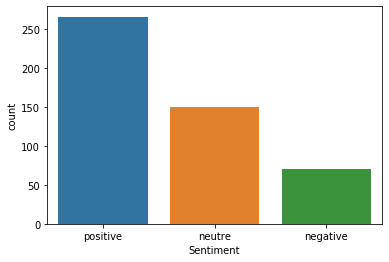

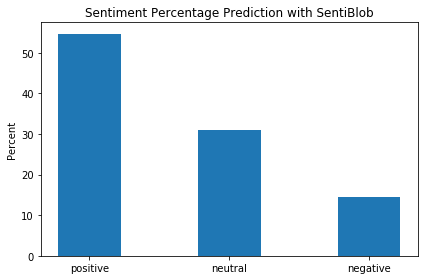


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 411 , negative : 15 , neutral : 60 

 SVM CLASSIFIER: 
 emotion positive : 297 , negative : 90 , neutral : 99

 RFC CLASSIFIER: 
 emotion positive : 426 , negative : 0, neutral : 60 

 Logistic Regression CLASSIFIER: 
 emotion positive : 336 , negative : 45 , neutral : 105

 ------------------- Classifiers Results:   ---------------------------------

 NB :
Positive: 84.5679012345679 % 
Negative: 3.0864197530864197 % 
Neutre: 12.345679012345679 %

 SVM :
Positive: 61.111111111111114 % 
Negative: 18.51851851851852 % 
Neutre: 20.37037037037037 %

 RFC :
Positive: 87.65432098765432 % 
Negative: % 0.0 
Neutre: 12.345679012345679 %

 LR :
Positive: 69.1358024691358 % 
Negative: 9.25925925925926 % 
Neutre: 21.604938271604937 %


Average :

Positive: 71.60493827160494 % 
Negative: 10.288065843621398 % 
Neutre: 18.10699588477366 %


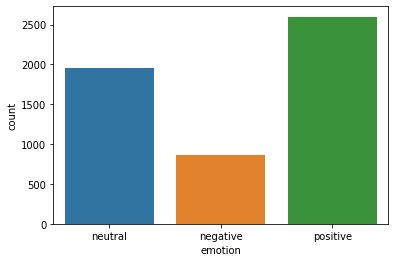

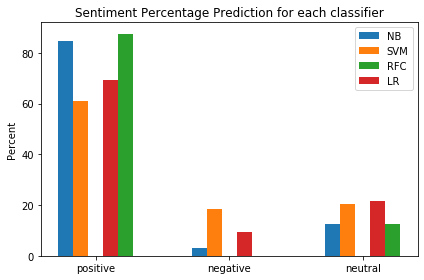

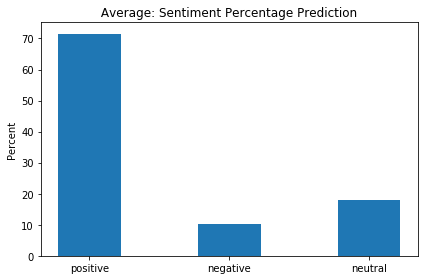

The score for the movie/serie  A Cinderella Story: Christmas Wish from iMDb is:  5.2 

 
 --------------------- the analyses for the movie/serie: The Lion King is : ---------------------------

 

                                                 Tweet Sentiment
0                     way watch really looking forward  positive
1    simba hey uncle scar guess scar dispise guessi...  negative
2                              dont deserve live simba  positive
3    entered alebots contest win kindle fire hd 8 c...  positive
4    lion king despite disneys recordbreaking box o...    neutre
..                                                 ...       ...
395  2020 composer composer season 8 composer compo...    neutre
396                                         2020 songs    neutre
397  aslan arslan means lion turkish inspired musli...  negative
398  bold look ivettearaiza perfection used prepare...  positive
399                cause nobody messes dad come mufasa    neutre

[400 rows x 2 columns]

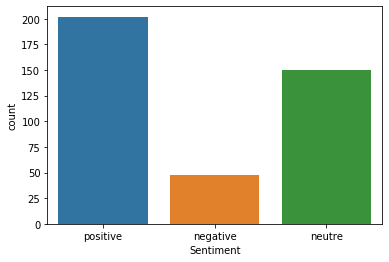

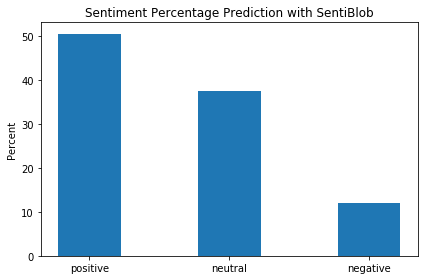


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 326 , negative : 16 , neutral : 58 

 SVM CLASSIFIER: 
 emotion positive : 263 , negative : 49 , neutral : 88

 RFC CLASSIFIER: 
 emotion positive : 368 , negative : 1, neutral : 31 

 Logistic Regression CLASSIFIER: 
 emotion positive : 289 , negative : 15 , neutral : 96

 ------------------- Classifiers Results:   ---------------------------------

 NB :
Positive: 81.5 % 
Negative: 4.0 % 
Neutre: 14.499999999999998 %

 SVM :
Positive: 65.75 % 
Negative: 12.25 % 
Neutre: 22.0 %

 RFC :
Positive: 92.0 % 
Negative: % 0.25 
Neutre: 7.75 %

 LR :
Positive: 72.25 % 
Negative: 3.75 % 
Neutre: 24.0 %


Average :

Positive: 73.16666666666666 % 
Negative: 6.666666666666667 % 
Neutre: 20.166666666666664 %


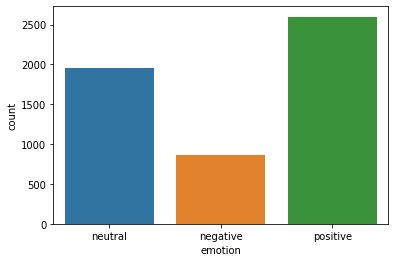

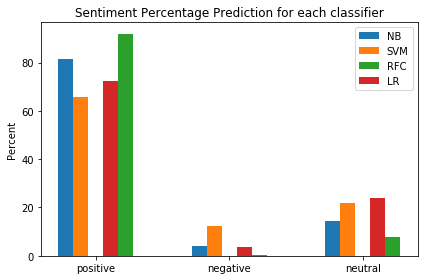

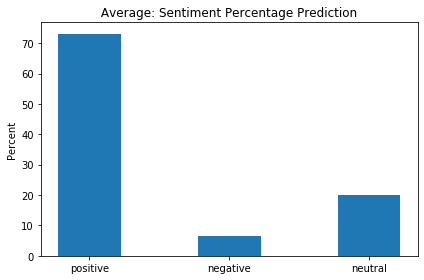

The score for the movie/serie  The Lion King from iMDb is:  7.0 

 
 --------------------- the analyses for the movie/serie: Grand Isle is : ---------------------------

 

                                                 Tweet Sentiment
0                 good movie nicolas cage crazy always  positive
1     grand isle playing also check itunes poster made  positive
2    youre grand isle son check grand isle availabl...  positive
3    ruff wednesday sending relaxing vibes way sadi...    neutre
4                          honor host premiere weekend    neutre
..                                                 ...       ...
395  lifted four apament building grand isle 6 feet...  positive
396  nicolas cage breaks iconic characters gqmagazi...  positive
397                         check styles backyarddecor    neutre
398  wishing nicolas cage happy bihday cages new fi...  positive
399      heads grand isle begins today townofgrandisle  positive

[400 rows x 2 columns]

 

Total number of twe

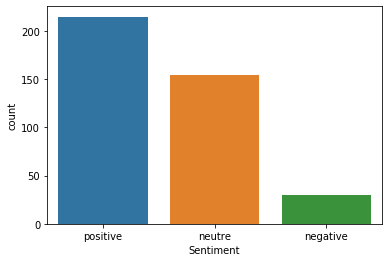

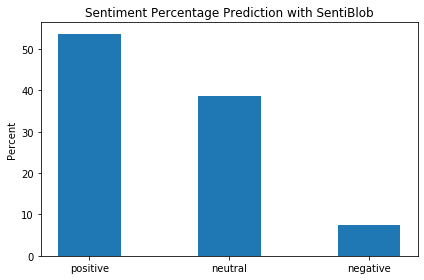


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 313 , negative : 14 , neutral : 73 

 SVM CLASSIFIER: 
 emotion positive : 268 , negative : 21 , neutral : 111

 RFC CLASSIFIER: 
 emotion positive : 386 , negative : 0, neutral : 14 

 Logistic Regression CLASSIFIER: 
 emotion positive : 303 , negative : 9 , neutral : 88

 ------------------- Classifiers Results:   ---------------------------------

 NB :
Positive: 78.25 % 
Negative: 3.5000000000000004 % 
Neutre: 18.25 %

 SVM :
Positive: 67.0 % 
Negative: 5.25 % 
Neutre: 27.750000000000004 %

 RFC :
Positive: 96.5 % 
Negative: % 0.0 
Neutre: 3.5000000000000004 %

 LR :
Positive: 75.75 % 
Negative: 2.25 % 
Neutre: 22.0 %


Average :

Positive: 73.66666666666667 % 
Negative: 3.666666666666666 % 
Neutre: 22.666666666666668 %


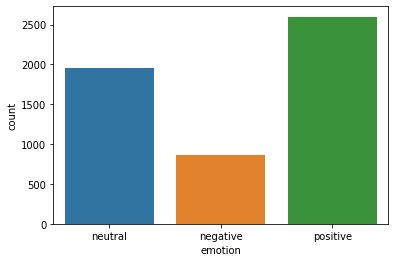

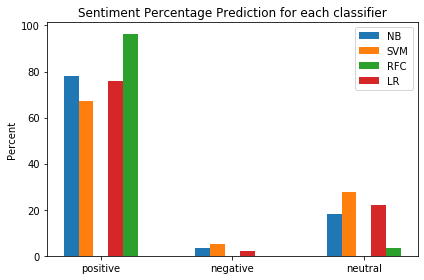

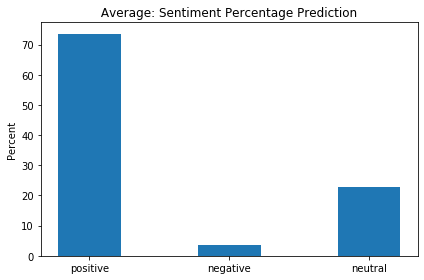

The score for the movie/serie  Grand Isle from iMDb is:  4.7 

 
 --------------------- the analyses for the movie/serie: Spectre is : ---------------------------

 

                                                  Tweet Sentiment
0     damage laptop sitting pajamas first cup earl g...  positive
1     damage laptop sitting pajamas first cup earl g...  positive
2     damage laptop sitting pajamas first cup earl g...  positive
3     variant zombieload flaw hits intels newest cas...    neutre
4     anthony joshua hits back outcry picture saudi ...  positive
...                                                 ...       ...
2511  vulnerable data people unaware huge threats po...  negative
2512  really shouldve stopped lacking besides new on...  positive
2513  director sam mendes exhausted via thelistmagazine  negative
2514  apparently weworks ceo neumann said kushner mb...  positive
2515  cia recording saudi crown prince ordering khas...    neutre

[2516 rows x 2 columns]

 

Total number

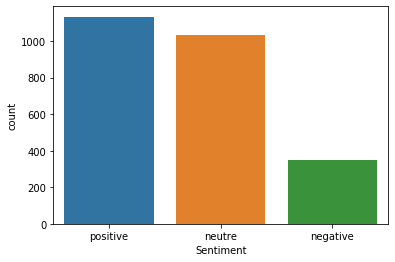

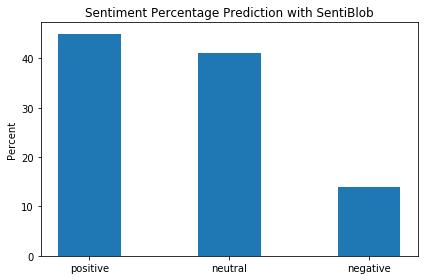


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 1574 , negative : 167 , neutral : 775 

 SVM CLASSIFIER: 
 emotion positive : 1215 , negative : 360 , neutral : 941

 RFC CLASSIFIER: 
 emotion positive : 2199 , negative : 6, neutral : 311 

 Logistic Regression CLASSIFIER: 
 emotion positive : 1469 , negative : 136 , neutral : 911

 ------------------- Classifiers Results:   ---------------------------------

 NB :
Positive: 62.55961844197139 % 
Negative: 6.637519872813991 % 
Neutre: 30.802861685214626 %

 SVM :
Positive: 48.29093799682035 % 
Negative: 14.308426073131955 % 
Neutre: 37.40063593004769 %

 RFC :
Positive: 87.4006359300477 % 
Negative: % 0.23847376788553257 
Neutre: 12.360890302066773 %

 LR :
Positive: 58.38632750397457 % 
Negative: 5.405405405405405 % 
Neutre: 36.20826709062003 %


Average :

Positive: 56.412294647588766 % 
Negative: 8.783783783783782 % 
Neutre: 34.80392156862745 %


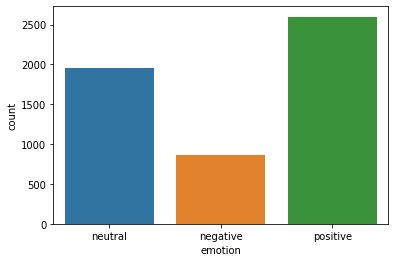

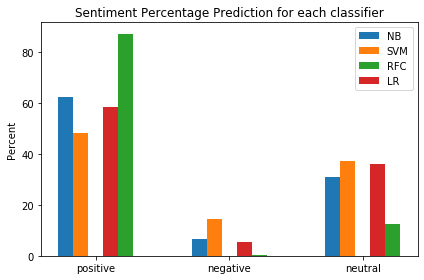

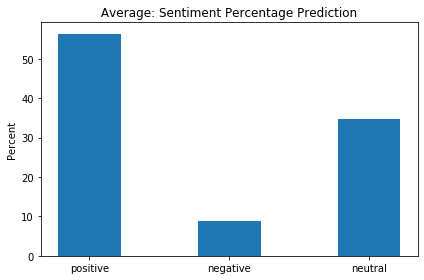

The score for the movie/serie  Spectre from iMDb is:  6.8 

 


,Serie/Movie Name,Positive Percent,IMDb Score
0,The Mandalorian,67.015873,9.0
1,The Godfather,68.717692,9.2
2,Hobgoblins,62.238199,2.2
3,Slender Man,66.014547,3.2
4,A Cinderella Story: Christmas Wish,71.604938,5.2
5,The Lion King,73.166667,7.0
6,Grand Isle,73.666667,4.7
7,Spectre,56.412295,6.8


In [22]:
import imdb 
import pandas as pd 
import re  

ia = imdb.IMDb()
movie_list=[]

for name in ('8111088', '0068646', '0089280', '5690360', '10326928', '6105098', '8380776', '2379713'):
    movie = ia.get_movie(name) 
    name = movie['title']
    score = movie.get('rating')
    #print("Name :",name,", Score :", score)
    movie_list.append((name,score))

df = pd.DataFrame(movie_list, columns = ['Name', 'Score']) 

def Clean_title(data):
    data=data.lower()
    data = data.replace(' ', '')
    data= re.sub(r'[^a-zA-Z0-9\s]', '', data)
    return data

df_name_clean = df['Name'].apply(Clean_title)


j=0
percent_post = []


for i in df_name_clean:
    print(" --------------------- the analyses for the movie/serie:", df['Name'][j], "is : ---------------------------")
    aver_mov = Api(i)
    print("The score for the movie/serie ",df['Name'][j] ,"from iMDb is: ",df['Score'][j], "\n\n ")
    percent_post.append(aver_mov) 
    j=j+1
    
#----------- Summary Display ----------

File_summary = {'Serie/Movie Name': df['Name'],
            'Positive Percent': percent_post,
            'IMDb Score': df['Score'],
           }

df_summ = pd.DataFrame(File_summary, columns= ['Serie/Movie Name', 'Positive Percent', 'IMDb Score'])

df_summ